In [1]:
## Let's look at what they look like

## slide 03

import pickle
import gzip
import openslide
import numpy as np
import pandas as pd
import anndata as ad


with gzip.open("../../results/Ovarian/compute_patches/all/patches_info.pkl.gz", "rb") as f:
    patches_info = pickle.load(f)

labels = pd.read_csv("../../results/Ovarian/compute_patches/all/spots_labels.csv")

## Check if coordinates are correct for a spot
spot_info = [patch for patch in patches_info if patch["name"] == "D1_NAB_HUG_03_spot22x61"][0]


# Open the whole slide image
slide = openslide.OpenSlide(spot_info["path_origin"])
# Get a thumbnail for quick visualization
thumbnail = slide.get_thumbnail(slide.dimensions).convert("RGB")

img = np.array(thumbnail)

emb = ad.read_h5ad("../../results/Ovarian/pipeline/uni/image_embedding.h5ad")


In [7]:

PALETTE = {
        "invasive cancer": "red",
        "immune infiltrate": "yellow",
        "epithelial": "green",
        "connective tissue": "blue",
        "undetermined": "lightgrey",
}

In [10]:
emb.obs.value_counts("knn_predicted_label")

knn_predicted_label
connective tissue    39160
invasive cancer      30289
immune infiltrate    18036
epithelial            1832
dtype: int64

/tmp/ipykernel_387355/4007404877.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(emb.obs.value_counts("knn_predicted_label").sort_values(),


([0, 1, 2, 3],
 [Text(0, 0, 'connective tissue'),
  Text(1, 0, 'invasive cancer'),
  Text(2, 0, 'immune infiltrate'),
  Text(3, 0, 'epithelial')])

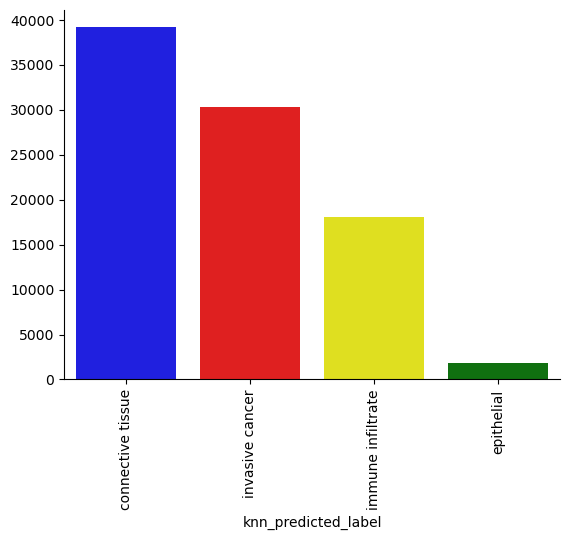

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(emb.obs.value_counts("knn_predicted_label").sort_values(),
            order=emb.obs.value_counts("knn_predicted_label").sort_values(ascending=False).index,
            palette=PALETTE)
sns.despine()
plt.xticks(rotation=90)

In [19]:
emb.obs["start_height_origin"] = emb.obs["start_height_origin"].apply(lambda x: int(x))
emb.obs["start_width_origin"] = emb.obs["start_width_origin"].apply(lambda x: int(x))
emb.obs["shape_pixel"] = emb.obs["shape_pixel"].apply(lambda x: int(x))


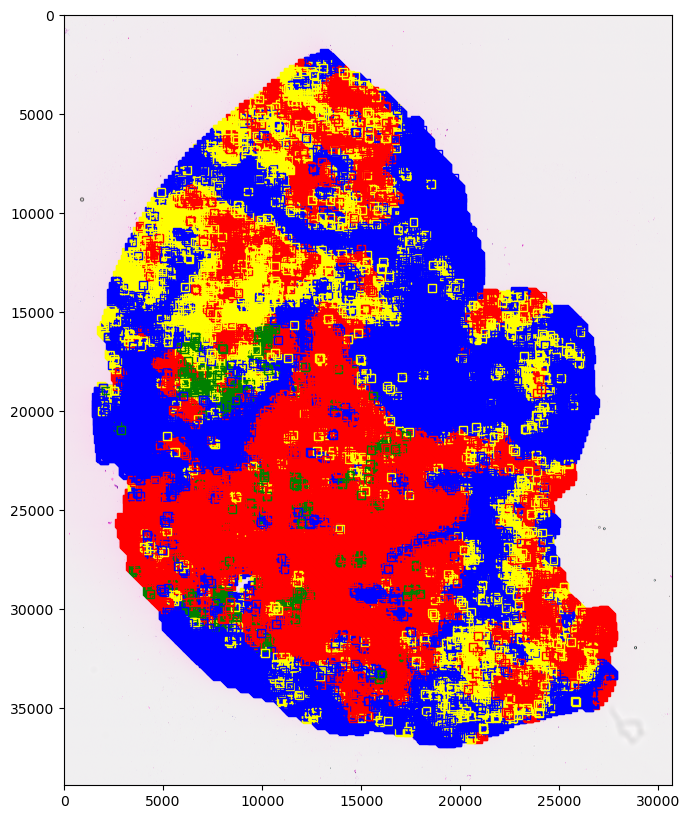

In [20]:
# Image with annotation after knn
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(thumbnail)

for idx, patch in emb.obs.iterrows():
    if patch["name_origin"] == "NAB-HUG-03_HE_Visium3_Scan1":
        color = PALETTE[patch["knn_predicted_label"]]
        rect = plt.Rectangle((patch["start_width_origin"], 
                            patch["start_height_origin"]), 
                            patch["shape_pixel"], 
                            patch["shape_pixel"], 
                            edgecolor=color, 
                            facecolor='none')
        ax.add_patch(rect)



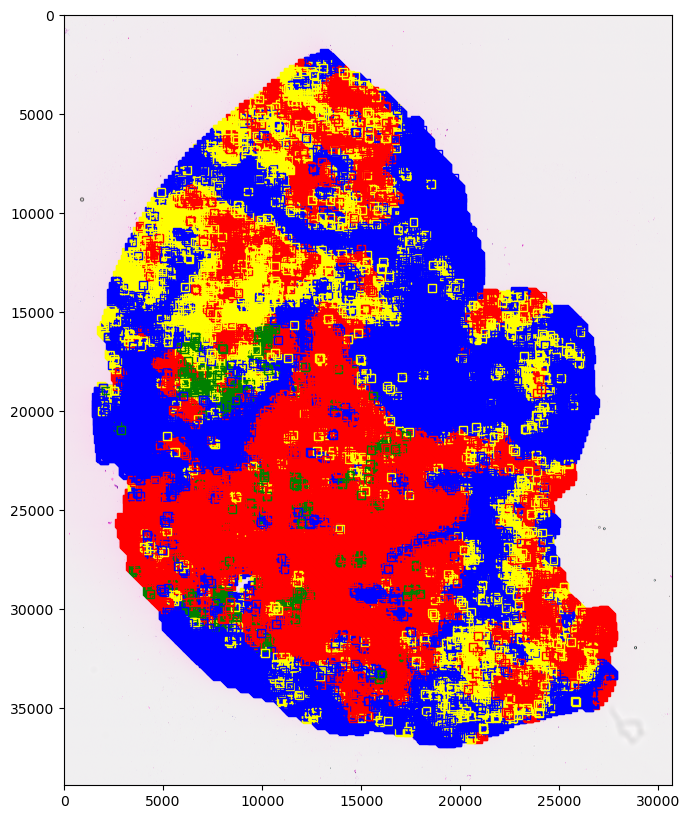

In [21]:
# Image with annotation after knn
emb_reannotated = ad.read_h5ad("../../results/Ovarian/pipeline/uni/image_embedding.h5ad")

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(thumbnail)

for idx, patch in emb.obs.iterrows():
    if patch["name_origin"] == "NAB-HUG-03_HE_Visium3_Scan1":
        color = PALETTE[patch["knn_predicted_label"]]
        rect = plt.Rectangle((patch["start_width_origin"], 
                            patch["start_height_origin"]), 
                            patch["shape_pixel"], 
                            patch["shape_pixel"], 
                            edgecolor=color, 
                            facecolor='none')
        ax.add_patch(rect)
